# Part II - (Findings from analysis of the Ford GoBike project in San Francisco)
## by (Ozigis Mutalib)

## Investigation Overview


> This analysis checks how long a user rides a bike for per trip, depending on their age,sex,if the user being either a customer or subscriber also determines the length of the bike usage.


## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system(Ford GoBike) covering the greater San Francisco Bay area for the month of February,2017.The data set contains information about 183412 bike trips.This information spread across 16 columns whose names are intuitive- duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id	end_station_name,end_station_latitude,end_station_longitude,bike_id	user_type,member_birth_year	member_gender,bike_share_for_all_trip.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [5]:
# load in the dataset into a pandas dataframe
bikes = pd.read_csv('bikeanalysed.csv')


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of Trips Durations

> Firstly, the distribution of the trips is skewed to the right from prelimnary histogram. A log transformation of the chart as shown below shows, majority of the trips made lasted between 500-600 seconds,with very few trips lasting 2000 seconds and above.More trips were made as the duration of the trip was increased until it reached the maximum of 500-600 seconds from which fewer people could go beyond that length of trip.




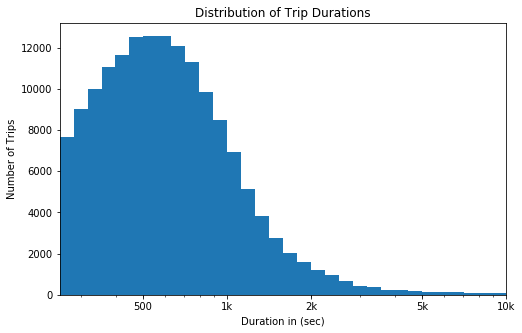

In [8]:
log_binsize = 0.05
log_bins = 10 ** np.arange(2.4, np.log10(bikes['duration_sec'].max()) + log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bikes, x = 'duration_sec', bins = log_bins)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration in (sec)')
plt.ylabel('Number of Trips')
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4], [500, '1k', '2k', '5k', '10k'])
plt.xlim(-500,10000);


## Duration of Trip to age category Relationship

>As adults use the bike rides most, their average length of ride is not significantly different from the few adults and seniors who eventually use the ride You should have at least three visualizations in your presentation,
but feel free to add more if you'd like!

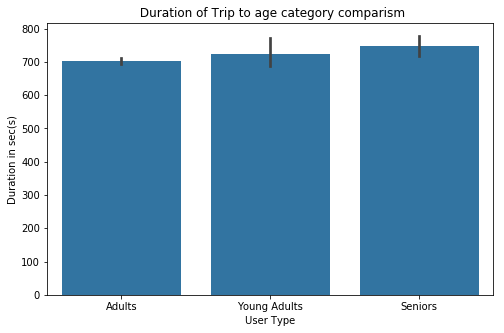

In [9]:
plt.figure(figsize = [8, 5])
base_color = sb.color_palette()[0]
sb.barplot(data =bikes, x = 'age_category', y = 'duration_sec', color = base_color)
plt.title(" Duration of Trip to age category comparism")
plt.xlabel('User Type')
plt.ylabel('Duration in sec(s)');

## Relationship between Trip Duration and Age By User_Type
>It can be seen that majority of the users were between ages 20-40 years and a lot of them used the bike for less than 2000 seconds with subscribers more than customers. subscribers are older people compared to customers.



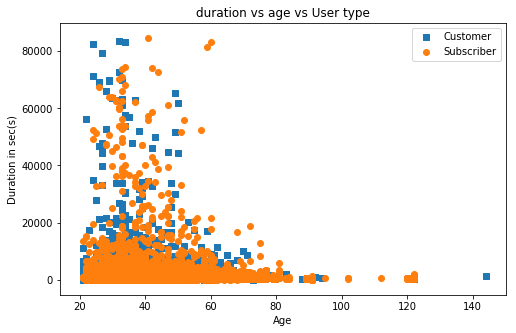

In [13]:
user_markers = [['Customer', 's'],['Subscriber', 'o']]
plt.figure(figsize=[8,5])
for user, marker in user_markers:
    df_user = bikes[bikes['user_type'] == user]
    plt.scatter((2022 - df_user['member_birth_year']), df_user['duration_sec'], marker = marker)
plt.legend(['Customer','Subscriber'])
plt.title('duration vs age vs User type')
plt.xlabel('Age')
plt.ylabel('Duration in sec(s)');

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
